In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get data
parent = os.path.dirname(os.getcwd())
dataPath = os.path.join(parent, 'Data/Pima/diabetes.csv')

df = pd.read_csv(dataPath)

In [2]:
# No apparent null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Nevermind, apparently 0 is a null value here. Except pregnancies, that might be a problem
dataset2 = df.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
for col in df.columns:
    df[col] = np.where(df[col] == 0, np.NaN, df[col])

df['Outcome'] = np.where(df['Outcome'].isnull(), 0, df['Outcome'])

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


/home/rachel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


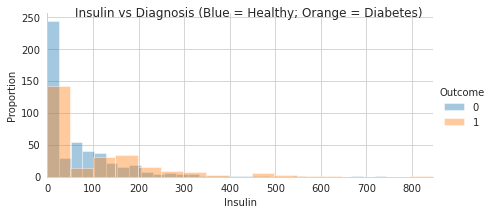

/home/rachel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


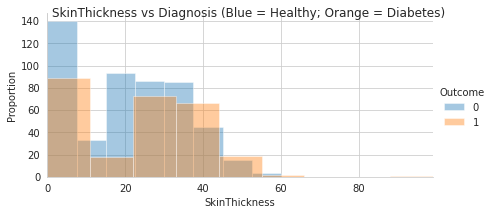

In [17]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(df,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(df,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

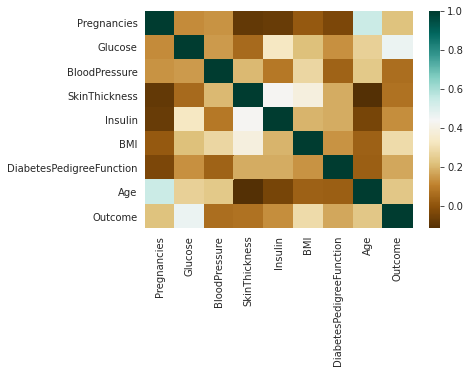

In [13]:
g = sns.heatmap(df.corr(),cmap="BrBG",annot=False)


<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

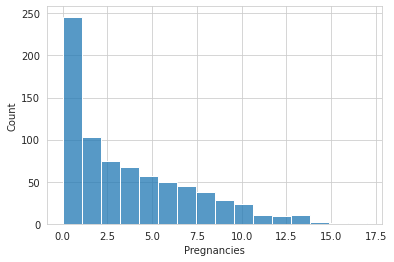

In [18]:
sns.histplot(data=df, x="Pregnancies")

In [19]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
# Seems to match 
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Pregnancies ---
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
---- Glucose ---
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64
---- BloodPressure ---
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64
---- SkinThickness ---
0     227
32     31
30     27
27     23
23     22
18     20